Найдем оптимальный размер чанка. Для этого запустим программу несколько раз при неизменных $n=10000, n=100000$ и $P=2$ и различных размерах чанка. Построим графики зависимости времени работы от размера чанка для $n=10000$ и $n=100000$.

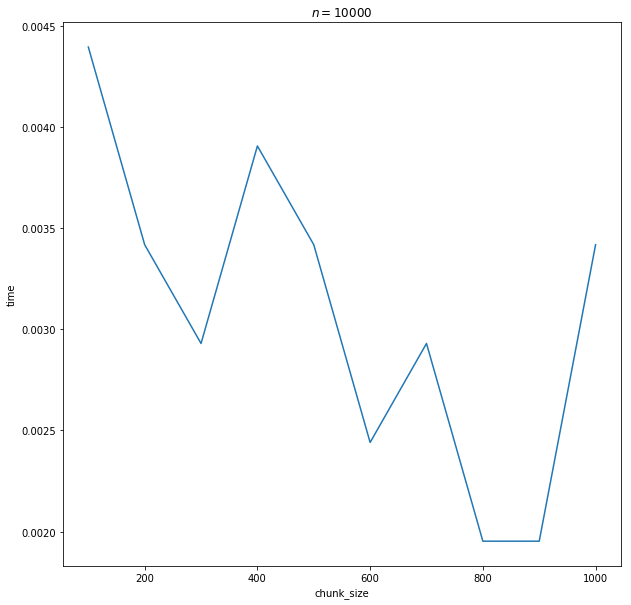

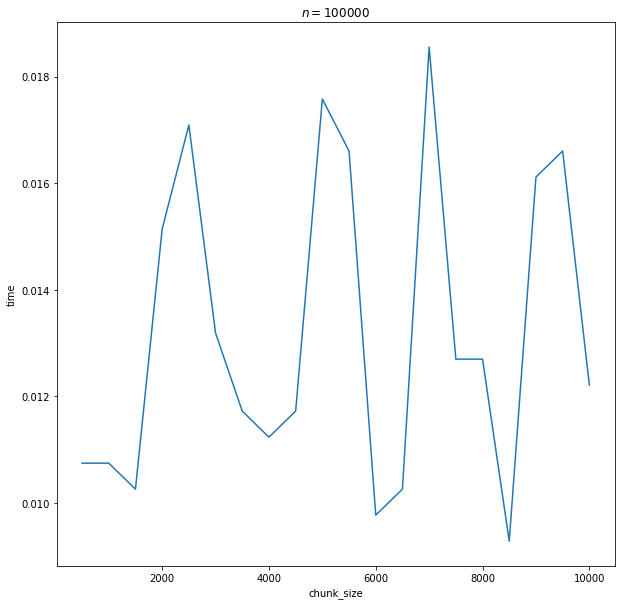

In [1]:
import matplotlib.pyplot as plt

optim_file = open("find_optimal_chunk.txt", "r")
time_values1 = [] #time values where n = 10000
chunk_values1 = [] #chunk values where n = 10000
for i in range (0, 10):
    line = optim_file.readline()
    line_stats = line.split(' ')
    time = line_stats[0].split('s')
    time_values1.append(float(time[0]))
    chunk_values1.append(int(line_stats[2]))
    
time_values2 = [] #time values where n = 100000
chunk_values2 = [] #chunk values where n = 100000
for i in range (0, 20):
    line = optim_file.readline()
    line_stats = line.split(' ')
    time = line_stats[0].split('s')
    time_values2.append(float(time[0]))
    chunk_values2.append(int(line_stats[2]))
    
plt.figure(figsize = (10, 10))
plt.plot(chunk_values1, time_values1)
plt.title("$n=10000$")
plt.ylabel('time')
plt.xlabel('chunk_size')
plt.show()

plt.figure(figsize = (10, 10))
plt.plot(chunk_values2, time_values2)
plt.title("$n=100000$")
plt.ylabel('time')
plt.xlabel('chunk_size')
plt.show()

Можно заметить, что время работы программы минимально, когда размер чанка составляет около $8$% от размера массива. Такой размер чанка и будем использовать в последующих опытах.

Теперь построим графики зависимости времени работы, ускорения и эффективности от числа потоков. Для этого запустим программу несколько раз при фиксированных значениях $n$ и размере чанка, но при разном числе потоков. Выберем размер массива достаточно большим, например, $n=10000000$. Размер чанка, $8$% от этого числа, равным $800000$. 

In [2]:
stats_file = open("stats.txt", "r")
P_values = [1, 2, 4, 8, 16]
T_values = []
S_values = []
E_values = []
qSort_time = []
qs = open("qSort_time.txt", "r")
for i in range(0, 5):
    line = stats_file.readline()
    line_stats = line.split(' ')
    time = line_stats[0].split('s')
    T_values.append(float(time[0])) #work time
    S_values.append(T_values[0] / T_values[i]) #acceleration
    E_values.append(S_values[i] / P_values[i]) #efficiency
    qline = qs.readline()
    qSort_time.append(float(qline))

Построи график $T(P)$, а так же отобразим время работы встроенной функции qsort (stdlib.h) на том же размере массива.

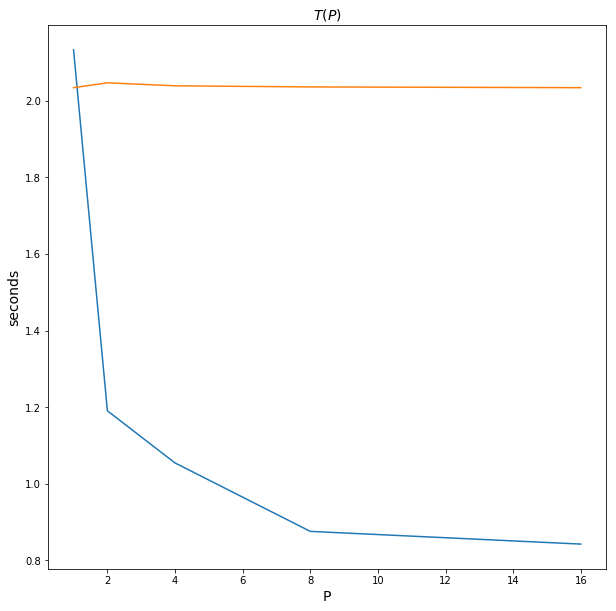

In [3]:
plt.figure(figsize = (10, 10))
plt.plot(P_values, T_values)
plt.plot(P_values, qSort_time)
plt.title('$T(P)$', fontsize = 14)
plt.xlabel('P', fontsize = 14)
plt.ylabel('seconds', fontsize = 14)
plt.show()

При одном потоке параллельный MergeSort работает примерно столько же, сколько и qsort. Однако при росте числа потоков время работы MergeSort уменьшается. В итоге получилось обогнать qsort более чем в 2 раза.

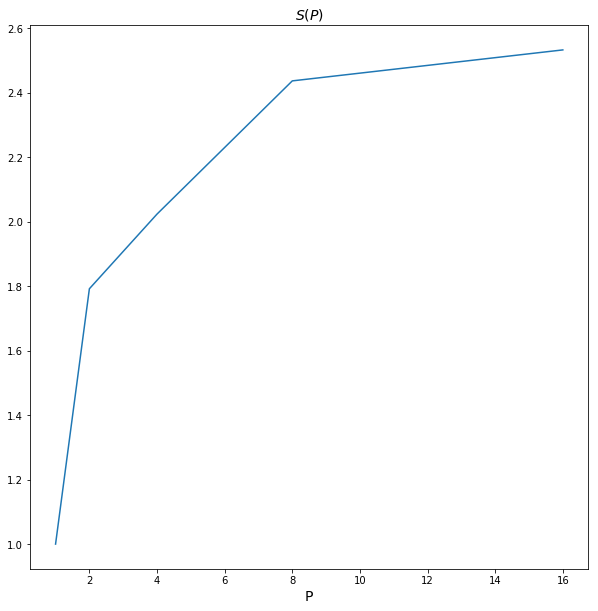

In [4]:
plt.figure(figsize = (10, 10))
plt.plot(P_values, S_values)
plt.title('$S(P)$', fontsize = 14)
plt.xlabel('P', fontsize = 14)
plt.show()

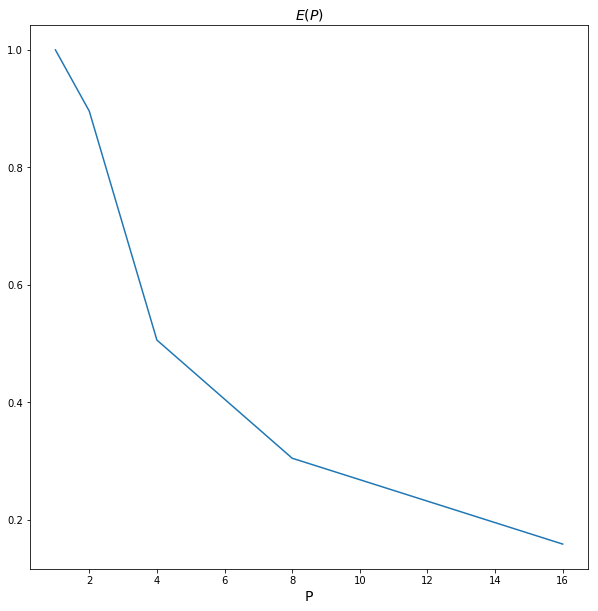

In [5]:
plt.figure(figsize = (10, 10))
plt.plot(P_values, E_values)
plt.title('$E(P)$', fontsize = 14)
plt.xlabel('P', fontsize = 14)
plt.show()